# Geospatial Data

data with location information is geospatial data, every observation has location data

In [ ]:
# https://www.youtube.com/watch?v=t7lliJXFt8w

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

#import an ESRI Shapfile and plotting it using GeoPandas

In [4]:
help(geopandas)

Help on package geopandas:

NAME
    geopandas

PACKAGE CONTENTS
    _compat
    _config
    _vectorized
    _version
    array
    base
    conftest
    datasets (package)
    geodataframe
    geoseries
    io (package)
    plotting
    sindex
    testing
    tests (package)
    tools (package)

DATA
    options = Options(
      display_precision: None [default: Non...USE_PYGEO...

VERSION
    0.9.0

FILE
    c:\users\clivia\anaconda3-2019.10\envs\iod\lib\site-packages\geopandas\__init__.py




In [5]:
# geopandas let you have the ability to open and import and use'.shp' file
# geopandas is built on matplotlib as well, so geopandas can use the same color 

In [8]:
path = r'D:\IOD\Data\Introduction to GeoPandas\Shapefiles\districts.shp'
districts = gpd.read_file(path)
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


In [10]:
print(type(districts))

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

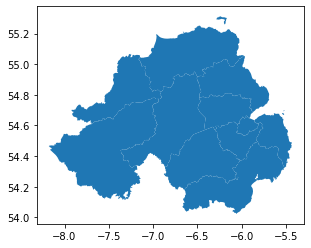

In [13]:
districts.plot()

<AxesSubplot:>

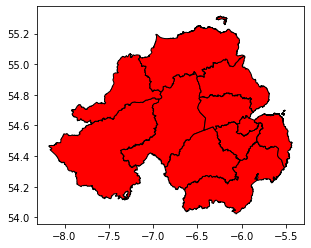

In [14]:
districts.plot(color = 'red', edgecolor = 'black')

<AxesSubplot:>

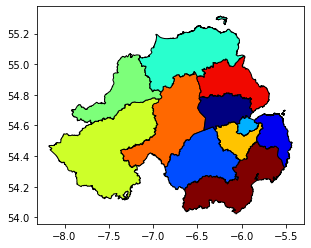

In [16]:
districts.plot(cmap = 'jet', edgecolor = 'black', column = 'district')  #cmap is color map

<AxesSubplot:>

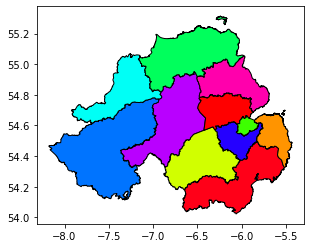

In [17]:
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')

In [21]:
path1 = r'D:\IOD\Data\Introduction to GeoPandas\Shapefiles\area_of_interest.shp'
area_of_interest = gpd.read_file(path1)
area_of_interest

,Id,geometry
0,0,"POLYGON ((-7.10243 54.53227, -7.10175 54.53254..."


<AxesSubplot:>

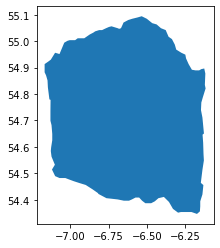

In [23]:
area_of_interest.plot()

<AxesSubplot:>

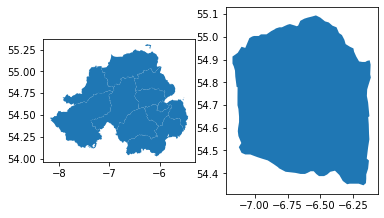

In [27]:
# plot the figures side by side
fig, (ax1, ax2) = plt.subplots(ncols = 2)
districts.plot(ax = ax1)
area_of_interest.plot(ax = ax2)

<AxesSubplot:>

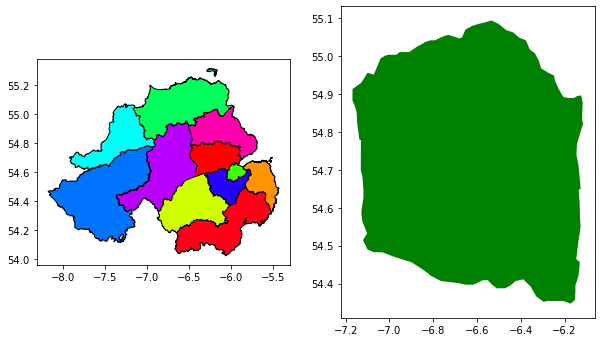

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
districts.plot(ax = ax1, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax2, color = 'green')

<AxesSubplot:>

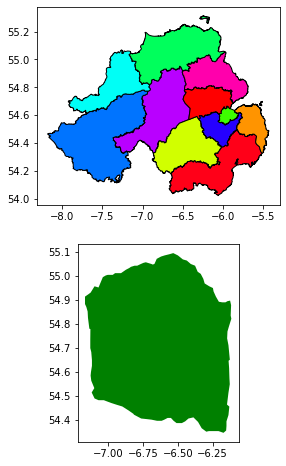

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (10,8))
districts.plot(ax = ax1, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax2, color = 'green')

<AxesSubplot:>

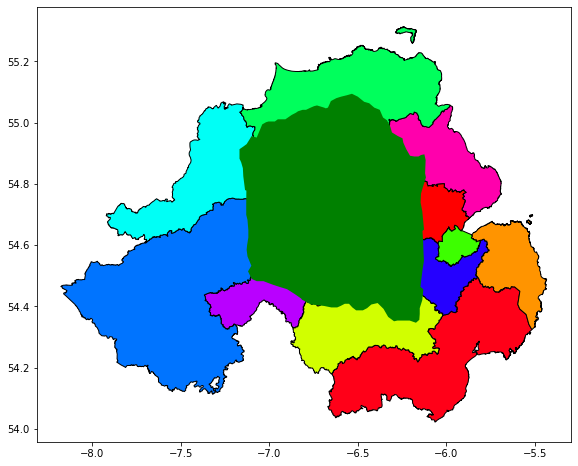

In [33]:
# plotting multiple layers
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'green')


<AxesSubplot:>

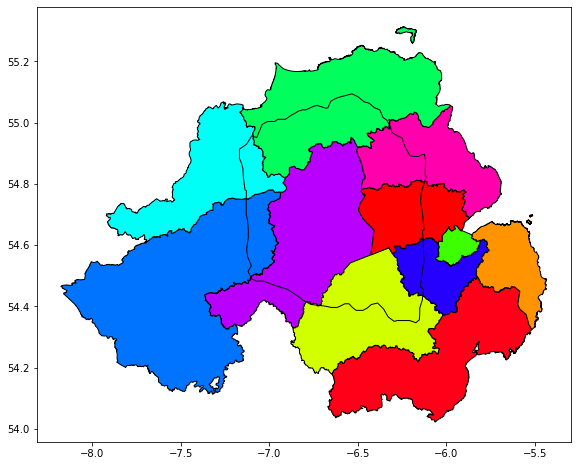

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')

In [37]:
path2 = r'D:\IOD\Data\Introduction to GeoPandas\Shapefiles\atms.shp'
atms = gpd.read_file(path2)
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,None,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,None,MULTIPOINT (-6.29858 54.43323)
4,None,MULTIPOINT (-6.21401 54.59141)


<AxesSubplot:>

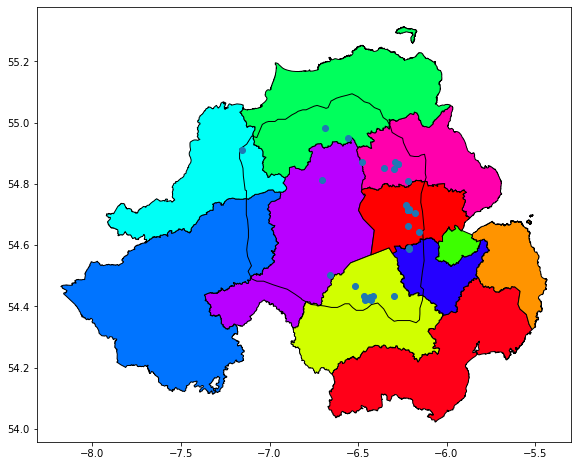

In [38]:
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms.plot(ax = ax)

<AxesSubplot:>

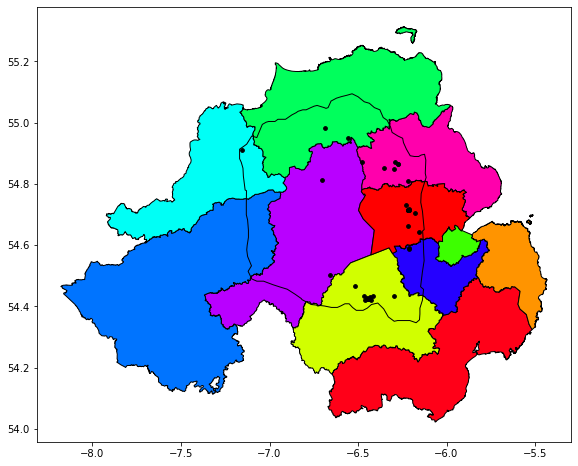

In [42]:
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms.plot(ax = ax, color = 'black', markersize =14)

In [45]:
# reprojecting GeoPandas GeoDataFrames, From one grs to another grs

In [46]:
districts = districts.to_crs(epsg = 32629) 

GOOGLE: 4326 is the EPSG identifier of WGSB4; WGS84: EPSG:4326

<AxesSubplot:>

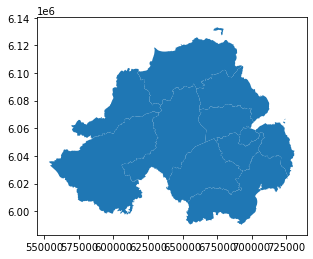

In [47]:
districts.plot()  # left side change to differenet measures

<AxesSubplot:>

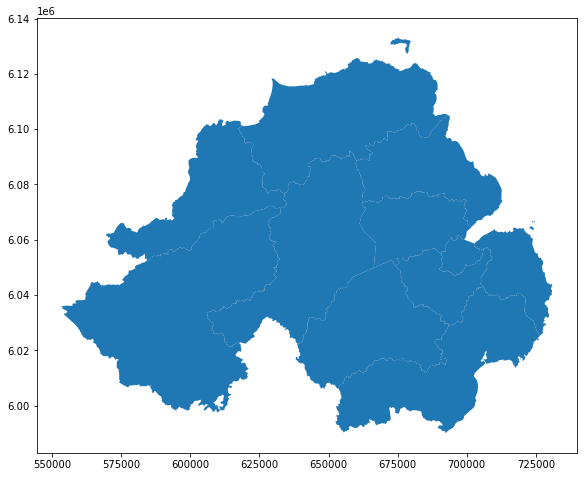

In [48]:
districts.plot(figsize = (10,8)) 

<AxesSubplot:>

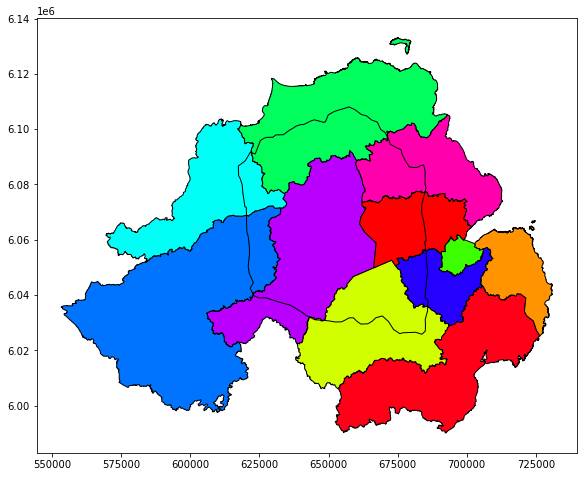

In [60]:
fig, ax = plt.subplots(figsize = (10,8))
districts = districts.to_crs(epsg = 32629)
districts.plot(ax = ax, figsize = (10,8), cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest = area_of_interest.to_crs(epsg = 32629)
area_of_interest.plot(ax = ax, figsize = (10, 8),color = 'none', edgecolor = 'black')

In [61]:
# Intersecting layers

<AxesSubplot:>

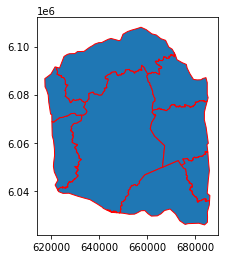

In [64]:
districts_in_aoi = gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(edgecolor = 'red')

In [70]:
# Calculating the areas of the intersected layer
print(districts_in_aoi.columns)
districts_in_aoi['area'] = districts_in_aoi.area/1000000   # as there is e inside 
print(districts_in_aoi.columns)
districts_in_aoi.head()

Index(['district', 'Id', 'geometry', 'area'], dtype='object')
Index(['district', 'Id', 'geometry', 'area'], dtype='object')


,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658017.072 6091916.291, 658023.630 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684916.646 6077240.234, 684908.771 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.696 6035736.759, 685894.090 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((643152.107 6031981.867, 643152...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682226.240 6077404.748, 682239.947 6...",462.822918


In [71]:
# Exporting GeoPandas GeoDataFrames into an ESRI Shapefile

In [73]:
#districts_in_aoi.to_file('districts_within_aoi.shp', driver = 'ESRI Sahrefile')